# Лабораторная работа №2

Исходные данные:
+ Датасет, согласно варианту (смотрим [тут](https://docs.google.com/spreadsheets/d/19lYYJEdA5IgjM2OHgqV0iGfREJCemXOBu1dsi2JteVo/edit?usp=sharing "Таблица"))

Что нужно сделать:
1. Осуществить предобработку данных (закодировать категориальные признаки, поработать с пропущенными значениями).  
2. Разделить данные на train и test выборку.
3. Обучить Scaler (sklearn.preprocessing.StandardScaler) на train, применить к train и test.  -- тут отшкалируем данные
2. Сделать класс MyDataDataset, который наследуется от Dataset, реализовать необходимый функционал. (датасеты будут train и test)
3. Инициализировать DataLoader с вашим MyDataDataset. (даталоадеры будет train и test)
4. Создать архитектуру нейросети.
5. Натренировать нейросеть на тренировочном множестве
6. Вывести метрики качества настроенной нейросети на трейне и тесте (accuracy, precision, recall, f1-score для классификации, MAE, RMSE, MAPE для регрессии).
7. Сделать выводы.
8. (Бонус) Визуализация функции ошибки и метрик при тренировке модели от эпохи к эпохе на трейне и тесте.

**Дедлайны**
- soft -- 23.11.2022
- hard -- начало зачетной недели

**Куда сдавать**
- telegram @l3lush
- почта m1603956@edu.misis.ru
- залить код в закрытый репозиторий и выдать права пользователю **l3lush**

# Пример, как импортить данные

In [1]:
import warnings
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch import nn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from pandas.api.types import CategoricalDtype 


warnings.filterwarnings("ignore")


from sklearn.datasets import fetch_openml
name_of_dataset = "electricity"  # название вашего датасета из таблицы
data = fetch_openml(name=name_of_dataset)

In [2]:
# show the data
data.data

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0000,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0000,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0000,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0000,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0000,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912
...,...,...,...,...,...,...,...,...
45307,0.9158,7,0.914894,0.044224,0.340672,0.003033,0.255049,0.405263
45308,0.9158,7,0.936170,0.044884,0.355549,0.003072,0.241326,0.420614
45309,0.9158,7,0.957447,0.043593,0.340970,0.002983,0.247799,0.362281
45310,0.9158,7,0.978723,0.066651,0.329366,0.004630,0.345417,0.206579


In [3]:
data.target

0          UP
1          UP
2          UP
3          UP
4        DOWN
         ... 
45307    DOWN
45308    DOWN
45309    DOWN
45310      UP
45311    DOWN
Name: class, Length: 45312, dtype: category
Categories (2, object): ['UP', 'DOWN']

In [4]:
# show head of data
data.data.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912


In [5]:
print(data.DESCR)

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the 

## 1 Предобработка данных

In [6]:
X = data.data

################################################################################################
# В результате экспериментов было решено не кодировать нейроны date и day, а исключить их  
# Подробнее в пункте 9 выводов                                                             


# Закордируем дни недели и даты, применив one_hot_encoded. 
# При этом число входных нейронов увеличится до 946
#X =  pd.concat([X, pd.get_dummies(X['day'], prefix='day')],axis=1)
#X.drop(['day'], axis=1, inplace=True, errors='ignore')

#X =  pd.concat([X, pd.get_dummies(X['date'], prefix='date')],axis=1)
#X.drop(['date'], axis=1, inplace=True, errors='ignore')

################################################################################################

# Исключим нейроны date и day, тогда число входных нейронов уменьшится на 2
X.drop(['date', 'day'], axis=1, inplace=True, errors='ignore')

# Закордируем period, применив one_hot_encode
# Число входных нейронов стало равно 53
#X =  pd.concat([X, pd.get_dummies(X['period'], prefix='period')],axis=1)
#X.drop(['period'], axis=1, inplace=True, errors='ignore')

print('X head: \n', X.head(), '\n-----------')

# Закордируем категориальные признаки так, что UP=1, DOWN=0
y = data.target.map({'UP':1, 'DOWN':0})
print('y head: \n', y.head(), '\n-----------')

# Приведем к типу Tensor
y=torch.tensor(y.to_numpy())

# Проверяем, что нет пропущенных значений ни в одной из колонок. Везде получаем 0, то есть данные не нуждаются
# в дополнительной обработке на пустые значения
print('The sum number of Nan values in all columns: \n', X.isnull().sum(axis = 0).sum, '\n-----------')

X head: 
      period  nswprice  nswdemand  vicprice  vicdemand  transfer
0  0.000000  0.056443   0.439155  0.003467   0.422915  0.414912
1  0.021277  0.051699   0.415055  0.003467   0.422915  0.414912
2  0.042553  0.051489   0.385004  0.003467   0.422915  0.414912
3  0.063830  0.045485   0.314639  0.003467   0.422915  0.414912
4  0.085106  0.042482   0.251116  0.003467   0.422915  0.414912 
-----------
y head: 
 0    1
1    1
2    1
3    1
4    0
Name: class, dtype: category
Categories (2, int64): [1, 0] 
-----------
The sum number of Nan values in all columns: 
 <bound method NDFrame._add_numeric_operations.<locals>.sum of period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
dtype: int64> 
-----------


## 2 Разделение на train и test

In [7]:
# Для сплита будем использовать функцию train_test_split из библиотеки sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print('X_train shape is', X_train.shape)
print('y_train shape is', y_train.shape)
print('X_test shape is', X_test.shape)
print('y_test shape is', y_test.shape)

X_train shape is (40780, 6)
y_train shape is torch.Size([40780])
X_test shape is (4532, 6)
y_test shape is torch.Size([4532])


## 3 Обучение Scaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sk = torch.tensor(scaler.transform(X_train))
X_test_sk = torch.tensor(scaler.transform(X_test))

print(X_test_sk)


tensor([[-1.4042e+00,  3.4375e-01, -4.3643e-01,  2.5274e-03, -1.0676e-06,
         -5.5947e-01],
        [-4.6647e-01,  4.2845e-01,  6.1647e-01,  2.5274e-03, -1.0676e-06,
         -5.5947e-01],
        [ 3.2700e-01,  5.6724e-02, -9.4878e-01,  2.5274e-03, -1.0676e-06,
         -5.5947e-01],
        ...,
        [ 1.3369e+00, -3.0901e-01, -4.9467e-01,  2.5274e-03, -1.0676e-06,
         -5.5947e-01],
        [-6.1073e-01, -7.6842e-01,  2.9614e-01, -1.7385e-01,  7.2950e-01,
         -7.0261e-01],
        [ 1.5533e+00, -1.6812e-01,  8.8654e-02,  2.5274e-03, -1.0676e-06,
         -5.5947e-01]], dtype=torch.float64)


## 4 Создание собственного класса CustomDataDataset

In [9]:
class CustomDataset(Dataset):
    def __init__(self, X_train, y_train):
        self.X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=True)
        self.y_train = torch.tensor(y_train)
        
    def __len__(self):
        return len(self.X_train)

    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]

## 5 Инициализия DataLoader

In [10]:
train = CustomDataset(X_train_sk, y_train)
test = CustomDataset(X_test_sk, y_test)

train_dataloader = DataLoader(train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test, batch_size=64, shuffle=True)

## 6 Создание архитектуры нейросети

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(6, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 2)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

## 7 Тренировка нейросети

In [16]:
model = NeuralNetwork() 

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #if batch % 100 == 0:
        #    loss, current = loss.item(), batch * len(X)
        #    print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            pred_soft=torch.softmax(pred, dim=1).argmax(dim=1)
            test_loss += loss_fn(pred, y).item()
            accuracy = torch.sum(pred_soft == y).float()
    test_loss /= num_batches
    accuracy /= len(y)
    return [accuracy, test_loss]


In [17]:
# Инициализируем массивы для отрисовки графиков
epoch_list=list()
accuracy_list=list()
loss_list=list()

# Инициализируем параметры для обучения
learning_rate = 1e-1
batch_size = 128
epochs = 50
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Обучаем
for t in range(epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer)
    metrics_list=test_loop(test_dataloader, model, loss_fn)
    print(f"Epoch {t+1} finished --> Accuracy: {(100*metrics_list[0]):>0.1f}%, Avg loss: {metrics_list[1]:>8f}") 
    epoch_list.append(t)
    accuracy_list.append(metrics_list[0])
    loss_list.append(metrics_list[1])
    

Epoch 1 finished --> Accuracy: 69.2%, Avg loss: 0.513345
Epoch 2 finished --> Accuracy: 82.7%, Avg loss: 0.469921
Epoch 3 finished --> Accuracy: 65.4%, Avg loss: 0.508173
Epoch 4 finished --> Accuracy: 82.7%, Avg loss: 0.471453
Epoch 5 finished --> Accuracy: 84.6%, Avg loss: 0.473883
Epoch 6 finished --> Accuracy: 82.7%, Avg loss: 0.464932
Epoch 7 finished --> Accuracy: 76.9%, Avg loss: 0.469826
Epoch 8 finished --> Accuracy: 78.8%, Avg loss: 0.448272
Epoch 9 finished --> Accuracy: 86.5%, Avg loss: 0.458877
Epoch 10 finished --> Accuracy: 84.6%, Avg loss: 0.446414
Epoch 11 finished --> Accuracy: 65.4%, Avg loss: 0.482131
Epoch 12 finished --> Accuracy: 71.2%, Avg loss: 0.469818
Epoch 13 finished --> Accuracy: 71.2%, Avg loss: 0.444150
Epoch 14 finished --> Accuracy: 75.0%, Avg loss: 0.457394
Epoch 15 finished --> Accuracy: 82.7%, Avg loss: 0.462032
Epoch 16 finished --> Accuracy: 78.8%, Avg loss: 0.471061
Epoch 17 finished --> Accuracy: 88.5%, Avg loss: 0.463290
Epoch 18 finished --> A

## 8(10) Метрики

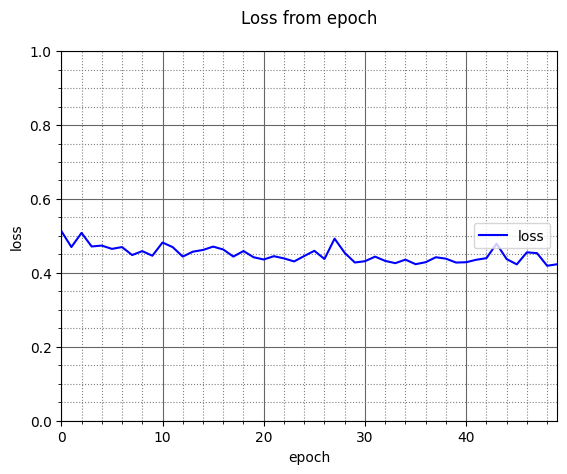

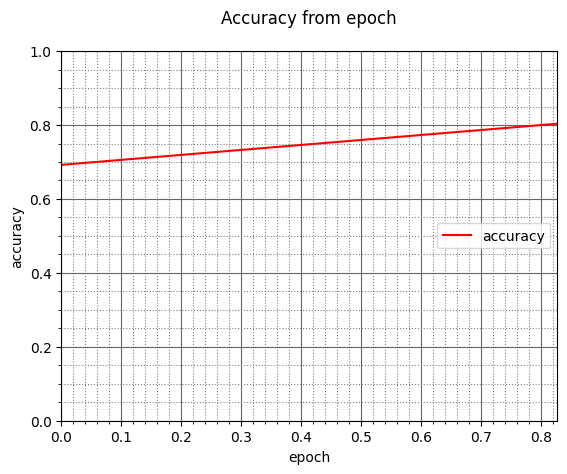

In [18]:
###################################
###  Построение графика потерь  ###
###################################
fig, axes = plt.subplots()


axes.plot(epoch_list, loss_list, color='blue', label='loss')
plt.title('Loss from epoch', pad = 20)
plt.ylabel('loss')
plt.xlabel('epoch')

axes.set_xlim(0, epoch_list[-1])
axes.set_ylim(0, 1)

plt.legend(loc=5)

# Добавление дополнительной ссетки
axes.grid(which='major', color = '#666666')
axes.minorticks_on()
axes.grid(which='minor', color = 'gray', linestyle = ':')


#####################################
###  Построение графика точности  ###
#####################################

fig, axes1 = plt.subplots()

axes1.plot(epoch_list, accuracy_list, color='red', label='accuracy')
plt.title('Accuracy from epoch', pad = 20)
plt.ylabel('accuracy')
plt.xlabel('epoch')

axes1.set_xlim(0, accuracy_list[-1])
axes1.set_ylim(0, 1)

plt.legend(loc=5)

# Добавление дополнительной ссетки
axes1.grid(which='major', color = '#666666')
axes1.minorticks_on()
axes1.grid(which='minor', color = 'gray', linestyle = ':')

# Вывод отрисовки на экран
plt.show()

## 9 Выводы

* В случае, если переводить date и day в one_hot_encoded, входной слой будет состоять из 946 нейронов, что делает нейронную сеть довольно тяжелой. А сами параметры, вероятно, мало влияют на выходной результат, так как будем считать, что цена на электричество мало зависит от дня недели, поэтому их можно опустить.
* Learning rate был выбран 0.1, как наиболее дающий результат
* Уже при 50 эпохах видно, что значение accuracy растет
* Размер батча выбран, как batch_size = 128. Замечено, что при большем размере батча, модель обучается несколько быстрее
* Для тестовой выборки было взято 10% от исходных наблюдений, что дает достаточную выборку и для X_train и для X_test
* Выполнена кодировка категориальных признаков для y_train